In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [179]:
# Loading Train dataset into jupyter
ds = pd.read_csv('Malignant_train.csv')

In [180]:
# Top contents of dataset
ds.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [181]:
# Checking info of dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


#### Observations:
    
    1) There are two columns with 'object' data type they are 'id' and 'comment_text'

    2) 'Malignant' , 'Highly_malignant' , 'rude' , 'threat' , 'abuse' , 'loathe' are all interger datatype

In [182]:
# Checking shape of dataset
ds.shape

(159571, 8)

#### Observations:
    
    1) The dataset has 159571 rows and 8 columns

In [183]:
# Checking any missing values in dataset
ds.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

#### Observations:
    
       1) There are no null values in the entire dataset

In [184]:
# Dropping unnecessary feature from dataset
ds.drop('id',axis = 1, inplace = True)

In [185]:
# Checking mathermatical relationship 
ds.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
# defining comments column under categories
categories = ds.columns[1:]

In [187]:
categories

Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

Comments in column malignant
[0 1]
0    144277
1     15294
Name: malignant, dtype: int64


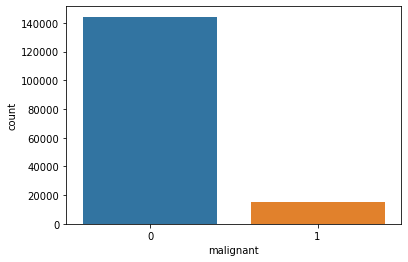



Comments in column highly_malignant
[0 1]
0    157976
1      1595
Name: highly_malignant, dtype: int64


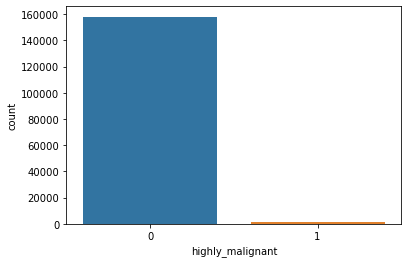



Comments in column rude
[0 1]
0    151122
1      8449
Name: rude, dtype: int64


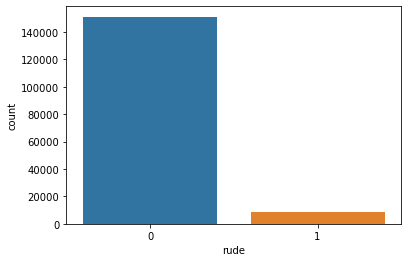



Comments in column threat
[0 1]
0    159093
1       478
Name: threat, dtype: int64


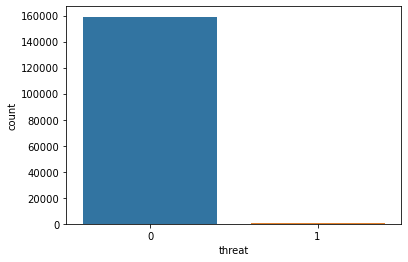



Comments in column abuse
[0 1]
0    151694
1      7877
Name: abuse, dtype: int64


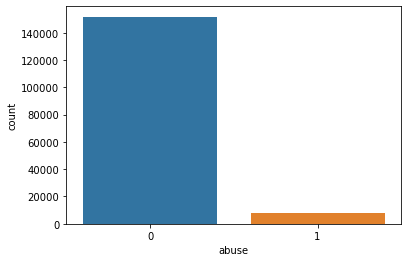



Comments in column loathe
[0 1]
0    158166
1      1405
Name: loathe, dtype: int64


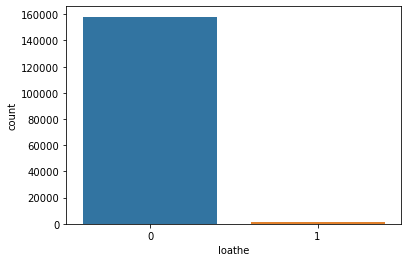

In [188]:
# Checking unique values of each column and plotting countplot of each column

for i in categories:
    print('Comments in column',i)
    print(ds[i].unique())
    print(ds[i].value_counts())
    sns.countplot(ds[i])
    plt.show()
    print('\n')

#### Observations:
    
    1) In each label maximum number of values are zero

In [189]:
# Verifying above statement
counts=ds.iloc[:,1:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

#### Observations:
    
    1) Maximum number of comments were malignant in nature.
    2) Rude and abuse had the second highest number of comments.
    3) Threat comments were the least

In [190]:
# Extracting details of percentage of columns which are neither of the defined categories

none = ds[(ds['malignant']!=1) & (ds['highly_malignant']!=1) & (ds['rude']!=1) & 
                            (ds['threat']!=1) & (ds['abuse']!=1) & (ds['loathe']!=1)]
percent=len(none)/len(ds)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


## PRE PROCESSING TEXT COLUMN

In [191]:
# importing required libraries
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
import re
from nltk.tokenize import word_tokenize

In [192]:
# checking the length of text column and saving it to new column length
ds['length'] = ds['comment_text'].str.len()
ds.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [193]:
# 1. Remove HTML tags
#Regex rule : ‘<.*?>’

def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text) # substring replace with ''(space)

ds.comment_text = ds.comment_text.apply(clean)
ds.comment_text

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [194]:
# 2. Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

ds.comment_text = ds.comment_text.apply(is_special)
ds.comment_text

0         Explanation Why the edits made under my userna...
1         D aww  He matches this background colour I m s...
2         Hey man  I m really not trying to edit war  It...
3           More I can t make any real suggestions on im...
4         You  sir  are my hero  Any chance you remember...
                                ...                        
159566          And for the second time of asking  when ...
159567    You should be ashamed of yourself   That is a ...
159568    Spitzer   Umm  theres no actual article for pr...
159569    And it looks like it was actually you who put ...
159570      And     I really don t think you understand ...
Name: comment_text, Length: 159571, dtype: object

In [195]:
# 3. Convert everything to lowercase
def to_lower(text):
    return text.lower()

ds.comment_text = ds.comment_text.apply(to_lower)
ds.comment_text

0         explanation why the edits made under my userna...
1         d aww  he matches this background colour i m s...
2         hey man  i m really not trying to edit war  it...
3           more i can t make any real suggestions on im...
4         you  sir  are my hero  any chance you remember...
                                ...                        
159566          and for the second time of asking  when ...
159567    you should be ashamed of yourself   that is a ...
159568    spitzer   umm  theres no actual article for pr...
159569    and it looks like it was actually you who put ...
159570      and     i really don t think you understand ...
Name: comment_text, Length: 159571, dtype: object

In [196]:
# 4 Replacing special characters from Review column

# Replace email addresses with 'email'
ds['comment_text'] = ds['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

# Replace URLs with 'webaddress'
ds['comment_text'] = ds['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
ds['comment_text'] = ds['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
ds['comment_text'] = ds['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')

# Replace numbers with 'numbr'
ds['comment_text'] = ds['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
ds['comment_text'] = ds['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
ds['comment_text'] = ds['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
ds['comment_text'] = ds['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [197]:
# 5. Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

ds.comment_text = ds.comment_text.apply(rem_stopwords)
ds.comment_text

0         [explanation, edits, made, username, hardcore,...
1         [aww, matches, background, colour, seemingly, ...
2         [hey, man, really, trying, edit, war, guy, con...
3         [make, real, suggestions, improvement, wondere...
4                       [sir, hero, chance, remember, page]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567    [ashamed, horrible, thing, put, talk, page, nu...
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, think, understand, came, idea, bad, r...
Name: comment_text, Length: 159571, dtype: object

In [198]:
# 6 Lemmatizing and stemming words

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

In [199]:
#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [200]:
# Processing review with above Function
processed_comments = []

for doc in ds.comment_text:
    processed_comments.append(preprocess(doc))
    
print(len(processed_comments))
processed_comments[:3]

159571


[['explan',
  'edit',
  'make',
  'usernam',
  'hardcor',
  'metallica',
  'fan',
  'revert',
  'vandal',
  'closur',
  'gas',
  'vote',
  'new',
  'york',
  'doll',
  'fac',
  'pleas',
  'remov',
  'templat',
  'talk',
  'page',
  'sinc',
  'retir',
  'numbr',
  'numbr',
  'numbr',
  'numbr'],
 ['aww',
  'match',
  'background',
  'colour',
  'seem',
  'stick',
  'thank',
  'talk',
  'numbr',
  'numbr',
  'januari',
  'numbr',
  'numbr',
  'utc'],
 ['hey',
  'man',
  'realli',
  'tri',
  'edit',
  'war',
  'guy',
  'constant',
  'remov',
  'relev',
  'inform',
  'talk',
  'edit',
  'instead',
  'talk',
  'page',
  'seem',
  'care',
  'format',
  'actual',
  'info']]

In [201]:
# Adding Processed_review column
ds['Processed_comments'] = processed_comments

In [202]:
# making changes to original column.
ds['comment_text'] = ds['Processed_comments'].apply(lambda x:' '.join(y for y in x))

Negative Comments in Column malignant


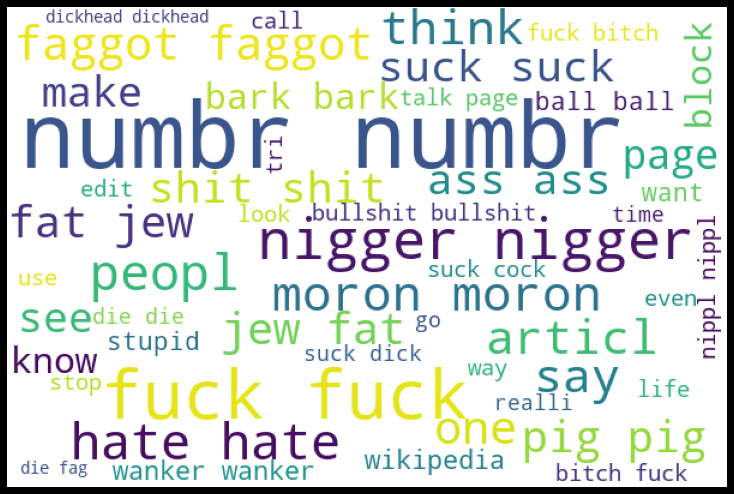



***********************************************************************************************************
Negative Comments in Column highly_malignant


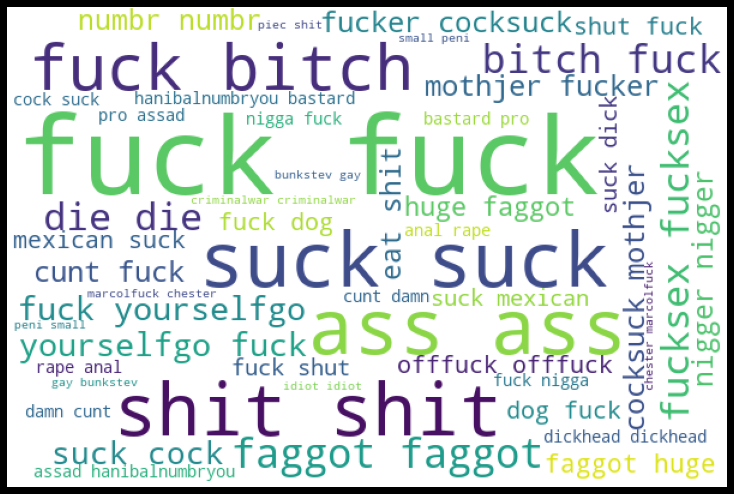



***********************************************************************************************************
Negative Comments in Column rude


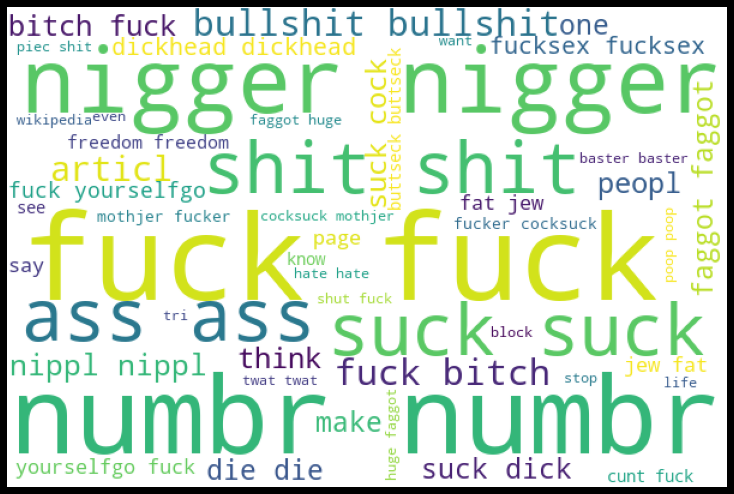



***********************************************************************************************************
Negative Comments in Column threat


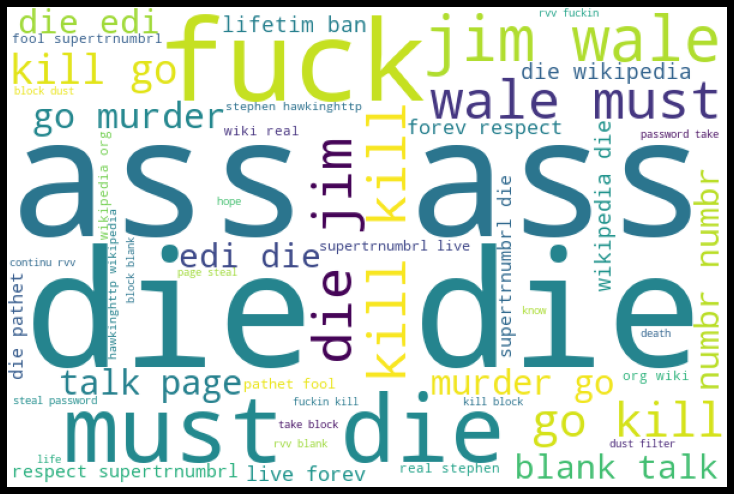



***********************************************************************************************************
Negative Comments in Column abuse


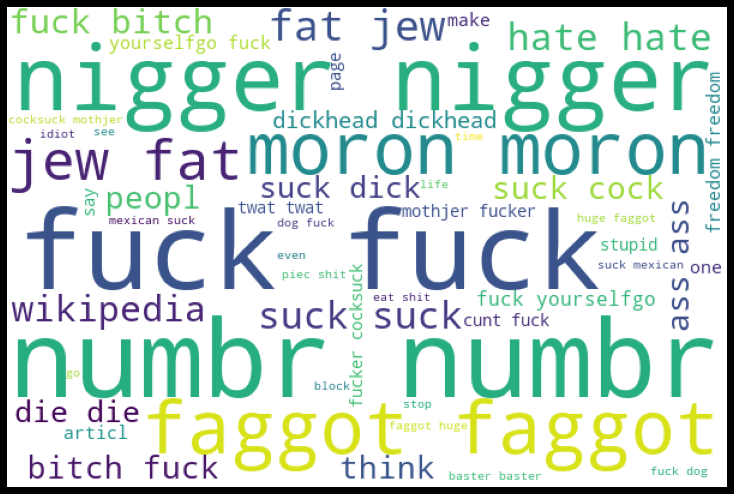



***********************************************************************************************************
Negative Comments in Column loathe


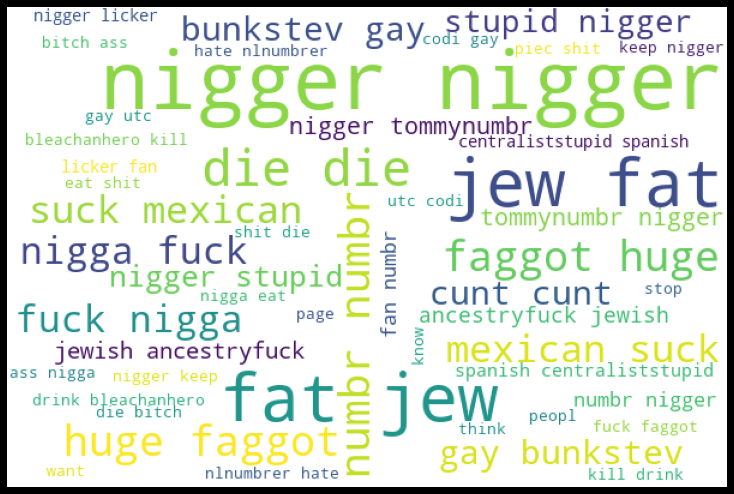



***********************************************************************************************************


In [26]:
# Getting sense of loud words which are offensive
from wordcloud import WordCloud

for j in categories:
    words = ds['comment_text'][ds[j]==1]
    comm_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(words))
    print('Negative Comments in Column',j)
    plt.figure(figsize=(10,8),facecolor='k')
    plt.imshow(comm_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    print('\n')
    print('***********************************************************************************************************')

In [203]:
# Let's Separate the input and target variables represented by x and y respectively in train data.
x = ds.comment_text
y = ds[categories]

# Let's Separate the input variable represented by test_x.
test_x = ds.comment_text

In [204]:
# importing TfidfVectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

In [205]:
# Converting the data into vectors

tf_vec = TfidfVectorizer(max_features=10000)

x_features = tf_vec.fit_transform(x)

test_x_features = tf_vec.fit_transform(test_x)

In [206]:
# importing train_test_split library
from sklearn.model_selection import train_test_split

In [207]:
# Splitting the training and testing data 

x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size=0.20, random_state=42)

In [208]:
# Checking shapes
print(x_features.shape)
print(test_x_features.shape)

(159571, 10000)
(159571, 10000)


### IN OUR DATASET THERE ARE 5 DIFFERENT COLUMNS WHICH WE NEED TO PREDICT, SO WE WILL USE MULTI LABEL CLASSIFICATION

In [209]:
# importing different machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


# importing metrics for our data
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss, log_loss
from sklearn.metrics import classification_report, confusion_matrix

# importing multiclass classification models
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance

In [210]:
# Creating the instances for the algorithms.

lg = LogisticRegression()
mnb = MultinomialNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [211]:
models = []
models.append(('LogisticRegression', lg))
models.append(('MultinomialNB', mnb))
models.append(('DecisionTreeClassifier', dt))
models.append(('KNeighborsClassifier', knn))
models.append(('SVC', svc))
models.append(('RandomForestClassifier', rf))
models.append(('AdaBoostClassifier', ab))
models.append(('GradientBoostingClassifier', gb))

In [213]:
# Creating the function for model evaluation using multi-label wrapper on various models.

def method(classifier):
    
    classifier.fit(x_train, y_train)
    predict = classifier.predict(x_test)

    # compute the training accuracy   
    print('Training Accuracy : {}'.format(accuracy_score(y_train, classifier.predict(x_train))), "\n")
    print('Test Accuracy : {}'.format(accuracy_score(y_test, predict)), "\n")

    # Computing Hamming Loss
    loss = hamming_loss(y_test, predict)
    print("Hamming_loss : {}".format(loss*100), "\n")

    # Computing log loss
    try : 
        loss = log_loss(y_test, predict)
    except :
        loss = log_loss(y_test, predict.toarray())
    print("Log_loss : {}".format(loss), "\n")

    # Computing classification report
    print("Classification Report :\n\n", classification_report(y_test, predict), "\n\n")
    
    
# Using oneVsRest Classifier wrapper
def onevsrest(models):
    for name, model in models:
        print('----------', name, '----------\n')
        trainer_method(OneVsRestClassifier(model))

        
# Using Binary Relevance wrapper
def binaryrelevance(models):
    for name, model in models:
        print('----------', name, '----------\n')
        trainer_method(BinaryRelevance(classifier = model, require_dense = [False, True]))

In [58]:
binaryrelevance(models)

---------- LogisticRegression ----------

Training Accuracy : 0.9249623989471705 

Test Accuracy : 0.91950493498355 

Hamming_loss : 1.9118491827249464 

Log_loss : 1.5991254271258646 

Classification Report :

               precision    recall  f1-score   support

           0       0.91      0.63      0.74      3056
           1       0.57      0.26      0.35       321
           2       0.91      0.64      0.75      1715
           3       0.67      0.14      0.22        74
           4       0.81      0.51      0.63      1614
           5       0.74      0.17      0.27       294

   micro avg       0.87      0.56      0.69      7074
   macro avg       0.77      0.39      0.50      7074
weighted avg       0.86      0.56      0.68      7074
 samples avg       0.06      0.05      0.05      7074
 


---------- MultinomialNB ----------

Training Accuracy : 0.9148336153412295 

Test Accuracy : 0.9108882970390099 

Hamming_loss : 2.3097811896182567 

Log_loss : 1.721845898995931 

Classi

In [57]:
onevsrest(models)

---------- LogisticRegression ----------

Training Accuracy : 0.9249623989471705 

Test Accuracy : 0.91950493498355 

Hamming_loss : 1.9118491827249464 

Log_loss : 1.5991254271258646 

Classification Report :

               precision    recall  f1-score   support

           0       0.91      0.63      0.74      3056
           1       0.57      0.26      0.35       321
           2       0.91      0.64      0.75      1715
           3       0.67      0.14      0.22        74
           4       0.81      0.51      0.63      1614
           5       0.74      0.17      0.27       294

   micro avg       0.87      0.56      0.69      7074
   macro avg       0.77      0.39      0.50      7074
weighted avg       0.86      0.56      0.68      7074
 samples avg       0.06      0.05      0.05      7074
 


---------- MultinomialNB ----------

Training Accuracy : 0.9148336153412295 

Test Accuracy : 0.9108882970390099 

Hamming_loss : 2.3097811896182567 

Log_loss : 1.721845898995931 

Classi

In [215]:
# Logistic Regression using Function

tuned_lg = LogisticRegression(penalty = 'l2', C = 20,n_jobs = -1, verbose = 1)

In [216]:
method(OneVsRestClassifier(tuned_lg))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished


Training Accuracy : 0.943034404963339 

Test Accuracy : 0.9173429421901927 

Hamming_loss : 1.864849339391091 

Log_loss : 1.5399636691191674 

Classification Report :

               precision    recall  f1-score   support

           0       0.85      0.71      0.77      3056
           1       0.53      0.33      0.40       321
           2       0.87      0.70      0.77      1715
           3       0.43      0.27      0.33        74
           4       0.79      0.58      0.67      1614
           5       0.60      0.29      0.39       294

   micro avg       0.82      0.64      0.72      7074
   macro avg       0.68      0.48      0.56      7074
weighted avg       0.81      0.64      0.71      7074
 samples avg       0.06      0.06      0.06      7074
 




In [171]:
classifier = OneVsRestClassifier(tuned_lg)
classifier.fit(x_features, y)
predict = classifier.predict(test_x_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished


In [172]:
# importing pickle library to save our model
import pickle

In [173]:
# saving the best model
finalmodel = 'Malignant_comment.pkl'
pickle.dump(classifier, open(finalmodel, 'wb'))

## IMPORTING TEST DATASET

In [144]:
# Loading test dataset
ds_test = pd.read_csv("test.csv")

In [145]:
# top data of test dataset
ds_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [146]:
# dropping id  column from test dataset
ds_test = ds_test.drop('id',axis = 1)

In [147]:
# checking shape of test dataset
ds_test.shape

(153164, 1)

In [148]:
# checking missing values in test dataset, if any....
ds_test.isnull().sum()

comment_text    0
dtype: int64

In [154]:
# adding column length containing length of comments in test dataset.
ds_test['length'] = ds_test['comment_text'].str.len()
ds_test.head()

,comment_text,length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


## TEXT PRE PROCESSING ON TEST DATASET SIMILAR TO TRAIN DATASET

In [155]:
# 1. Remove HTML tags
#Regex rule : ‘<.*?>’

def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text) # substring replace with ''(space)

ds_test.comment_text = ds_test.comment_text.apply(clean)
ds_test.comment_text

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 153164, dtype: object

In [156]:
# 2. Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

ds_test.comment_text = ds_test.comment_text.apply(is_special)
ds_test.comment_text

0         Yo bitch Ja Rule is more succesful then you ll...
1            From RfC       The title is fine as it is  ...
2                 Sources         Zawe Ashton on Lapland...
3          If you have a look back at the source  the in...
4                 I don t anonymously edit articles at all 
                                ...                        
153159        i totally agree  this stuff is nothing but...
153160       Throw from out field to home plate        D...
153161            Okinotorishima categories       I see ...
153162              One of the founding nations of the E...
153163           Stop already  Your bullshit is not welc...
Name: comment_text, Length: 153164, dtype: object

In [157]:
# 3. Convert everything to lowercase
def to_lower(text):
    return text.lower()

ds_test.comment_text = ds_test.comment_text.apply(to_lower)
ds_test.comment_text

0         yo bitch ja rule is more succesful then you ll...
1            from rfc       the title is fine as it is  ...
2                 sources         zawe ashton on lapland...
3          if you have a look back at the source  the in...
4                 i don t anonymously edit articles at all 
                                ...                        
153159        i totally agree  this stuff is nothing but...
153160       throw from out field to home plate        d...
153161            okinotorishima categories       i see ...
153162              one of the founding nations of the e...
153163           stop already  your bullshit is not welc...
Name: comment_text, Length: 153164, dtype: object

In [158]:
# 4 Replacing special characters from Review column

# Replace email addresses with 'email'
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

# Replace URLs with 'webaddress'
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


# Replace numbers with 'numbr'
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
ds_test['comment_text'] = ds_test['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [159]:
# 5. Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

ds_test.comment_text = ds_test.comment_text.apply(rem_stopwords)
ds_test.comment_text

0         [yo, bitch, ja, rule, succesful, ever, whats, ...
1                                   [rfc, title, fine, imo]
2                          [sources, zawe, ashton, lapland]
3         [look, back, source, information, updated, cor...
4                             [anonymously, edit, articles]
                                ...                        
153159         [totally, agree, stuff, nothing, long, crap]
153160    [throw, field, home, plate, get, faster, throw...
153161    [okinotorishima, categories, see, changes, agr...
153162    [one, founding, nations, eu, germany, law, ret...
153163    [stop, already, bullshit, welcome, fool, think...
Name: comment_text, Length: 153164, dtype: object

In [160]:
# 6 Lemmatizing and stemming words

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

# Processing review with above Function
processed_comments = []

for doc in ds_test.comment_text:
    processed_comments.append(preprocess(doc))
    
print(len(processed_comments))
processed_comments[:3]

153164


[['bitch',
  'rule',
  'succes',
  'ever',
  'what',
  'hat',
  'sad',
  'mofucka',
  'bitch',
  'slap',
  'pethed',
  'white',
  'face',
  'get',
  'kiss',
  'ass',
  'guy',
  'sicken',
  'rule',
  'pride',
  'music',
  'man',
  'diss',
  'shit',
  'nothin',
  'wrong',
  'bein',
  'like',
  'tupac',
  'brother',
  'fuckin',
  'white',
  'boy',
  'get',
  'thing',
  'right',
  'next',
  'time'],
 ['rfc', 'titl', 'fine', 'imo'],
 ['sourc', 'zaw', 'ashton', 'lapland']]

In [161]:
# Adding Processed_review column
ds_test['Processed_comments'] = processed_comments

# making changes to original column.
ds_test['comment_text'] = ds_test['Processed_comments'].apply(lambda x:' '.join(y for y in x))

In [162]:
ds_test['comment_text']

0         bitch rule succes ever what hat sad mofucka bi...
1                                         rfc titl fine imo
2                                  sourc zaw ashton lapland
3         look back sourc inform updat correct form gues...
4                                        anonym edit articl
                                ...                        
153159                      total agre stuff noth long crap
153160    throw field home plate get faster throw cut ma...
153161    okinotorishima categori see chang agre correct...
153162    one found nation germani law return quit simil...
153163    stop alreadi bullshit welcom fool think kind e...
Name: comment_text, Length: 153164, dtype: object

In [163]:
# CONVERTING TEXT INTO VECTORS using TfidfVectorizer

test_x = ds_test.comment_text

from sklearn.feature_extraction.text import TfidfVectorizer

# Converting the data into vectors

tf_vec = TfidfVectorizer(max_features=10000)

x_features = tf_vec.fit_transform(ds_test['comment_text'])

test_x_features = tf_vec.fit_transform(test_x)

In [174]:
# Loading saved model for applying on test dataset
final_model= pickle.load(open('Malignant_comment.pkl', "rb"))

In [175]:
# fitting model to test dataset
final_test = final_model.predict(test_x_features)

In [176]:
# checking results of test dataset.
final_test

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [167]:
# Creating a column to add the predicted values in the test dataframe.

ds_test_data = pd.DataFrame(final_test, columns = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'])
ds_test_data

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [168]:
# Concatinating the test data frame and predicted values dataframe.

ds_test = pd.concat([ds_test, ds_test_data], axis=1)
ds_test

,comment_text,length,Processed_comments,malignant,highly_malignant,rude,threat,abuse,loathe
0,bitch rule succes ever what hat sad mofucka bi...,367,"[bitch, rule, succes, ever, what, hat, sad, mo...",0,0,0,0,0,0
1,rfc titl fine imo,50,"[rfc, titl, fine, imo]",0,0,0,0,0,0
2,sourc zaw ashton lapland,54,"[sourc, zaw, ashton, lapland]",0,0,0,0,0,0
3,look back sourc inform updat correct form gues...,205,"[look, back, sourc, inform, updat, correct, fo...",0,0,0,0,0,0
4,anonym edit articl,41,"[anonym, edit, articl]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
153159,total agre stuff noth long crap,60,"[total, agre, stuff, noth, long, crap]",0,0,0,0,0,0
153160,throw field home plate get faster throw cut ma...,198,"[throw, field, home, plate, get, faster, throw...",0,0,0,0,0,0
153161,okinotorishima categori see chang agre correct...,423,"[okinotorishima, categori, see, chang, agre, c...",0,0,0,0,0,0
153162,one found nation germani law return quit simil...,502,"[one, found, nation, germani, law, return, qui...",0,0,0,0,0,0


In [231]:
# checking no. of malignant comments
ds_test['malignant'].value_counts()

0    146800
1      6364
Name: malignant, dtype: int64

In [232]:
# checking column highly_malignant for negative comments
ds_test['highly_malignant'].value_counts()

0    153135
1        29
Name: highly_malignant, dtype: int64

In [233]:
# checking column rude for negative comments
ds_test['rude'].value_counts()

0    152208
1       956
Name: rude, dtype: int64

In [234]:
# checking column threat for negative comments
ds_test['threat'].value_counts()

0    153159
1         5
Name: threat, dtype: int64

In [235]:
# checking column abuse for negative comments
ds_test['abuse'].value_counts()

0    151501
1      1663
Name: abuse, dtype: int64

In [236]:
# checking column loathe for negative comments
ds_test['loathe'].value_counts()

0    153132
1        32
Name: loathe, dtype: int64